In [1]:
import Rible as RB
include(joinpath(pathof(RB),"../../yard/nonsmooth.jl"))
figdir::String = joinpath(pathof(RB),"../../tmp")
include(joinpath(pathof(RB),"../../test/vis.jl"))

tw = 455.8843 #pt |> pt2px
scalefactor = 4

4

In [2]:
include(joinpath(pathof(RB),"../../examples/robots/woodpecker.jl"))

woodpecker (generic function with 1 method)

Contact Surfaces

In [3]:
halfspaces = RB.StaticContactSurfaces(
    [
        RB.HalfSpace([0,-1.0,0],[0,-0.0025,0]),
        RB.HalfSpace([0, 1.0,0],[0, 0.0025,0])
    ]
)

Rible.StaticContactSurfaces{Vector{Rible.HalfSpace{Float64, 3}}}(Rible.HalfSpace{Float64, 3}[Rible.HalfSpace{Float64, 3}([0.0, -1.0, 0.0], -0.0025, [0.0, -0.0025, 0.0]), Rible.HalfSpace{Float64, 3}([0.0, 1.0, 0.0], -0.0025, [0.0, 0.0025, 0.0])])

## Limit cylces

In [4]:
wt = woodpecker()
dt = 1e-4
tspan = (0.0,2.0)
prob = RB.DynamicsProblem(
    wt,
    halfspaces,
    RB.RestitutionFrictionCombined(
        RB.NewtonRestitution(),
        RB.CoulombFriction(),
    )
)

spring_velocity = [0.0, 0.0, -0.3411]


Rible.DynamicsProblem{Rible.Robot{Rible.Structure{TypeSortedCollections.TypeSortedCollection{Tuple{Vector{Rible.RigidBody{3, 3, Float64, Rible.NCF.NC{3, 3, Float64, 9}, Rible.RigidBodyCache{StaticArraysCore.SMatrix{3, 12, Float64, 36}, Rible.InertiaCache{StaticArraysCore.SMatrix{12, 12, Float64, 144}, StaticArraysCore.SMatrix{12, 12, Float64, 144}, StaticArraysCore.MVector{12, Float64}}}, Nothing}}}, 1}, TypeSortedCollections.TypeSortedCollection{Tuple{Vector{Rible.Apparatus{Rible.PrototypeJoint{Rible.Hen2Egg{Rible.Signifier{Rible.RigidBody{3, 3, Float64, Rible.NCF.NC{3, 3, Float64, 9}, Rible.RigidBodyCache{StaticArraysCore.SMatrix{3, 12, Float64, 36}, Rible.InertiaCache{StaticArraysCore.SMatrix{12, 12, Float64, 144}, StaticArraysCore.SMatrix{12, 12, Float64, 144}, StaticArraysCore.MVector{12, Float64}}}, Nothing}, Int64, Int64}, Rible.Signifier{Rible.RigidBody{3, 3, Float64, Rible.NCF.NC{3, 3, Float64, 9}, Rible.RigidBodyCache{StaticArraysCore.SMatrix{3, 12, Float64, 36}, Rible.Inerti

Zhong06

f = 1 / period = 7.660000000000001
length(falling_distances) - 1 = 14
falling_distances[begin + 1:end] .- falling_distances[begin:end - 1] |> mean = -0.014742927197630918
[ Info: Saving to limit_cycles.pdf


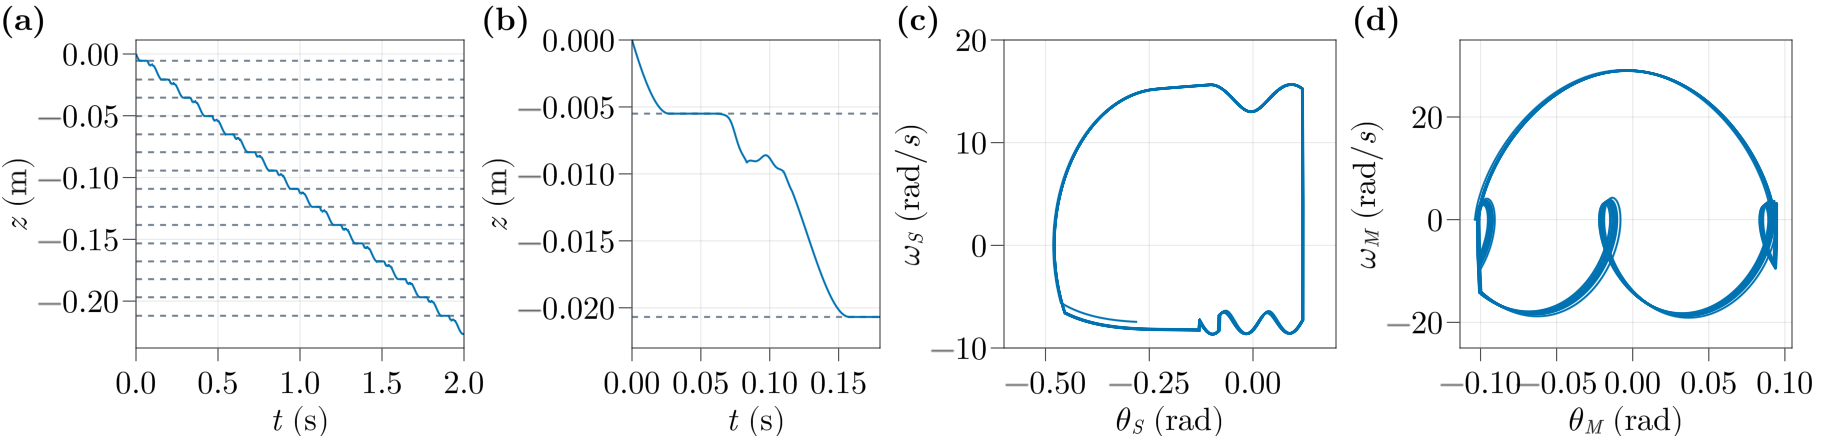

In [5]:
RB.solve!(
    prob,
    RB.DynamicsSolver(
        RB.Zhong06(),
        RB.InnerLayerContactSolver(
            RB.InteriorPointMethod()
        )
    );
    dt,tspan,ftol=1e-10,maxiters=50,verbose=false,
    exception=false,progress=false,
    max_restart=3
)


GM.activate!(;scalefactor);with_theme(theme_pub;
        size = (1tw,0.24tw),
        figure_padding = (0,fontsize,0,0)
    ) do

    b1g = RB.get_trajectory!(wt,1,0)
    b1ω = RB.get_mid_angular_velocity!(wt,1)
    b1θ = RB.get_mid_orientation!(wt,1)
    b2ω = RB.get_mid_angular_velocity!(wt,2)
    b2θ = RB.get_mid_orientation!(wt,2)
    fig = Figure()
    ax1 = Axis(fig[1,1],xlabel = tlabel, ylabel = L"z~(\mathrm{m})")
    ax2 = Axis(fig[1,2],xlabel = tlabel, ylabel = L"z~(\mathrm{m})")
    ax3 = Axis(fig[1,3],xlabel = L"\theta_S~(\mathrm{rad})", ylabel = L"\omega_S~(\mathrm{rad}/s)",)
    ax4 = Axis(fig[1,4],xlabel = L"\theta_M~(\mathrm{rad})", ylabel = L"\omega_M~(\mathrm{rad}/s)",)

    period = 0.13054830287206265
    @show f = 1/period
    stiction_times = collect(0.05:period:2.0)
    stiction_steps = RB.time2step.(stiction_times,Ref(wt.traj.t))
    falling_distances = b1g[3,stiction_steps]
    @show length(falling_distances) - 1
    @show falling_distances[begin+1:end] .- falling_distances[begin:end-1] |> mean
    hlines!(ax1,falling_distances,color=:slategrey,linestyle=:dash)
    lines!(ax1,wt.traj.t,b1g[3,:])
    xlims!(ax1,0,2.0)
    hlines!(ax2,falling_distances,color=:slategrey,linestyle=:dash)
    lines!(ax2,wt.traj.t,b1g[3,:])
    xlims!(ax2,0,0.18)
    ylims!(ax2,-0.023,0)

    lines!(ax3,b2θ[3,:],b2ω[1,:])
    xlims!(ax3,-0.6,0.2)
    ylims!(ax3,-10,20)
    lines!(ax4,b1θ[3,:],b1ω[1,:],)
    ylims!(ax4,-25,35)

    Label(fig[1,1,TopLeft()],"($(alphabet[1]))",font=:bold)
    Label(fig[1,2,TopLeft()],"($(alphabet[2]))",font=:bold)
    Label(fig[1,3,TopLeft()],"($(alphabet[3]))",font=:bold)
    Label(fig[1,4,TopLeft()],"($(alphabet[4]))",font=:bold)
    colsize!(fig.layout,2,Relative(0.2))
    colgap!(fig.layout,0.5fontsize)
    savefig(fig,"limit_cycles";backend=CM)
    fig
end

## Convergence analysis

spring_velocity = [0.0, 0.0, -0.3411]
spring_velocity = [0.0, 0.0, -0.3411]
spring_velocity = [0.0, 0.0, -0.3411]
spring_velocity = [0.0, 0.0, -0.3411]
spring_velocity = [0.0, 0.0, -0.3411]
spring_velocity = [0.0, 0.0, -0.3411]
spring_velocity = [0.0, 0.0, -0.3411]
spring_velocity = [0.0, 0.0, -0.3411]
Progress: 100%|█████████████████████████████████████████| Time: 0:03:47
spring_velocity = [0.0, 0.0, -0.3411]
Progress: 100%|█████████████████████████████████████████| Time: 0:00:03
spring_velocity = [0.0, 0.0, -0.3411]
spring_velocity = [0.0, 0.0, -0.3411]
spring_velocity = [0.0, 0.0, -0.3411]
spring_velocity = [0.0, 0.0, -0.3411]
spring_velocity = [0.0, 0.0, -0.3411]
spring_velocity = [0.0, 0.0, -0.3411]
spring_velocity = [0.0, 0.0, -0.3411]
Progress: 100%|█████████████████████████████████████████| Time: 0:03:56
[ Info: Saving to woodpecker_convergence.pdf


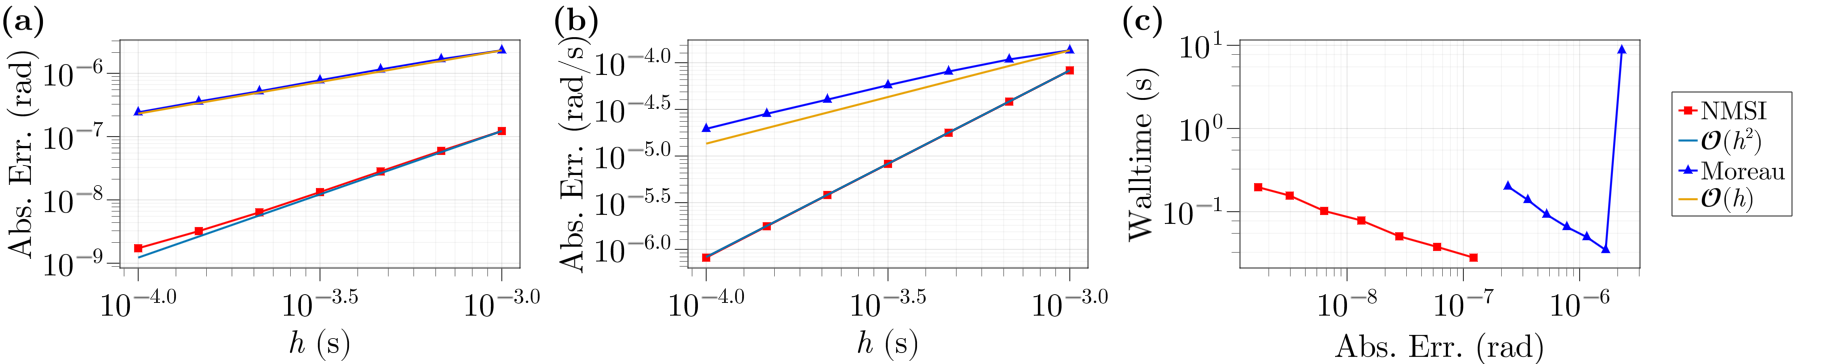

In [6]:
dts = vcat(
    [10^(-x) for x in range(3,4;length=7)],
    1e-7
)
tspan = (0.0,0.02)
function get_stats(tspan,dts)
    [
        begin
            @timed RB.solve!(
                RB.DynamicsProblem(
                    woodpecker(),
                    halfspaces,
                    RB.RestitutionFrictionCombined(
                        RB.NewtonRestitution(),
                        RB.CoulombFriction(),
                    )
                ),
                RB.DynamicsSolver(
                    solver,
                    RB.InnerLayerContactSolver(
                        RB.InteriorPointMethod()
                    )
                );
                dt,tspan,ftol=ifelse(dt==1e-7,1e-14,1e-12),maxiters=50,verbose=false,
                exception=true,progress=true,
                max_restart=3
            ).prob.bot
        end
        for dt in dts, solver in (RB.Zhong06(), RB.Moreau(0.5))
    ];
end
stats_wt_dts = get_stats(tspan, dts)
wt_dts = map((x)->x.value,stats_wt_dts)


GM.activate!(;scalefactor); with_theme(theme_pub;
        size = (1tw,0.2tw)
    ) do
    fig = Figure()
    ax1 = Axis(fig[1,1],ylabel = "Abs. Err. (rad)")
    ax2 = Axis(fig[1,2],ylabel = "Abs. Err. (rad/s)")
    ax3 = Axis(fig[1,3],xlabel = "Abs. Err. (rad)", ylabel = "Walltime (s)")
    _,err_avg_nmsi_traj = RB.get_err_avg(vcat(wt_dts[begin:end-1,1],wt_dts[end,2]);bid=2,pid=2,di=2,field=:traj)
    plot_convergence_order!(ax1,dts[begin:end-1],err_avg_nmsi_traj;orders=[2],label="NMSI")
    _,err_avg_moreau_traj = RB.get_err_avg(wt_dts[:,2];bid=2,pid=2,di=2,field=:traj)
    plot_convergence_order!(ax1,dts[begin:end-1],err_avg_moreau_traj;orders=[1],marker=:utriangle,color=:blue,label="Moreau")
    _,err_avg_nmsi_vel = RB.get_err_avg(vcat(wt_dts[begin:end-1,1],wt_dts[end,2]);bid=2,pid=2,di=3,field=:midvel)
    plot_convergence_order!(ax2,dts[begin:end-1],err_avg_nmsi_vel;orders=[2],label="NMSI")
    _,err_avg_moreau_vel = RB.get_err_avg(wt_dts[:,2];bid=2,pid=2,di=3,field=:midvel)
    plot_convergence_order!(ax2,dts[begin:end-1],err_avg_moreau_vel;orders=[1],marker=:utriangle,color=:blue,label="Moreau")
    Legend(fig[1,4],ax2,)
    moreau_time = map((x)->x.time-x.gctime,stats_wt_dts[begin:end-1,2])
    nmsi_time = map((x)->x.time-x.gctime,stats_wt_dts[begin:end-1,1])
    scatterlines!(ax3,err_avg_moreau_traj,moreau_time;marker=:utriangle,color=:blue,)
    scatterlines!(ax3,err_avg_nmsi_traj,nmsi_time;marker=:rect,color=:red)
    ax3.xscale = Makie.log10
    ax3.xminorticksvisible = true
    ax3.xminorgridvisible = true
    ax3.xminorticks = IntervalsBetween(8)
    ax3.yscale = Makie.log10
    ax3.yminorticksvisible = true
    ax3.yminorgridvisible = true
    ax3.yminorticks = IntervalsBetween(4)
    Label(fig[1,1,TopLeft()],"($(alphabet[1]))",font=:bold)
    Label(fig[1,2,TopLeft()],"($(alphabet[2]))",font=:bold)
    Label(fig[1,3,TopLeft()],"($(alphabet[3]))",font=:bold)
    savefig(fig,"woodpecker_convergence";backend=CM)
    fig
end

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*